# ABOUT DATASET

### Importing required Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import dabl
# import statsmodels
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel


# function to perform post-hoc test
import statsmodels.stats.multicomp as mc
# import function to perform post-hoc
# install scikit_posthocs using "!pip install scikit_posthocs" 
import scikit_posthocs


# import the functions to perform Chi-square tests
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare

## Data Loading

In [7]:
df=pd.read_csv('S1.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
df['Avg score'] = (df['math score'] + df['reading score'] + df['writing score'])/3

In [3]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

### Categorical

1.Gender

2.Race/Ethnicity

3.Parental Level of Education

4.Lunch

5.Test Preparation Course

### Numerical 

1.Math Score

2.Reading Score

3.Writing Score

### Shape of the Data

In [4]:
df.shape

(1000, 8)

### Checking Null Values

In [5]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### Checking Column DataTypes

In [6]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

### Numerical Columns

In [38]:
df_num = df.iloc[:,[5,6,7]]
df_num

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


### Statistical Summary using .describe method

In [8]:
df_num.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# DESCRIPTIVE STATISTICS

### Measures of Central Tendency

In [9]:
df_num.mean()

math score       66.089
reading score    69.169
writing score    68.054
dtype: float64

In [10]:
df_num.median()

math score       66.0
reading score    70.0
writing score    69.0
dtype: float64

In [11]:
df_num.mode()

,math score,reading score,writing score
0,65,72,74


### Measures of Dispersion

In [12]:
df_num.var()

math score       229.918998
reading score    213.165605
writing score    230.907992
dtype: float64

In [13]:
df_num.std()

math score       15.163080
reading score    14.600192
writing score    15.195657
dtype: float64

### Detection of Outliers

In [14]:
mean=df_num.mean()
from scipy.stats import trim_mean
trimmed_mean=list(trim_mean(df_num, proportiontocut = 0.01))
pd.DataFrame({'mean':mean,'trimmed_mean':trimmed_mean})

,mean,trimmed_mean
math score,66.089,66.222449
reading score,69.169,69.292857
writing score,68.054,68.189796


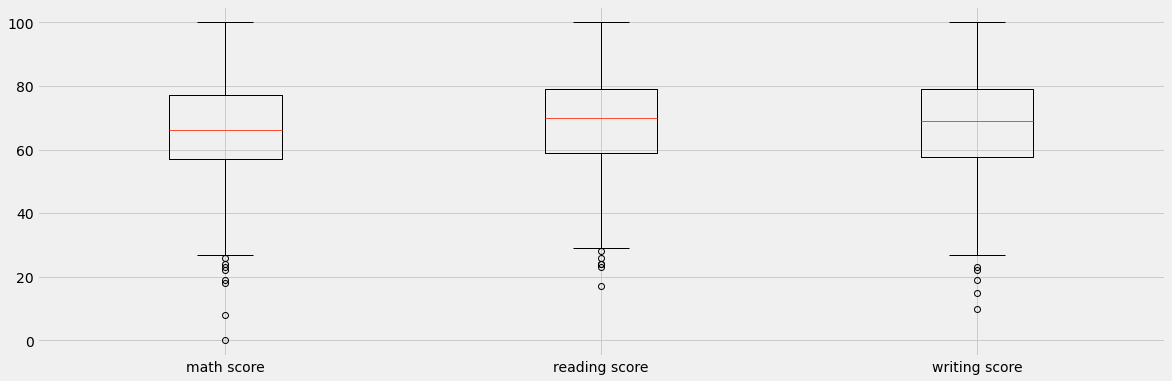

In [202]:
plt.boxplot([df_num["math score"],df_num["reading score"],df_num["writing score"]])
plt.xticks([1,2,3],["math score","reading score","writing score"])
plt.show()

In [16]:
q1=df['math score'].quantile(0.25)
q3=df['math score'].quantile(0.75)
IQR=q3-q1
outliers=[]
lower_bound=q1-(1.5*IQR)
higher_bound=q3+(1.5*IQR)
for i in df['math score']:
    if i<lower_bound:
        outliers.append(i)    
for i in df['math score']:
    if i>higher_bound:
        outliers.append(i) 
print(outliers)

[18, 0, 22, 24, 26, 19, 23, 8]


### Distribution of Data

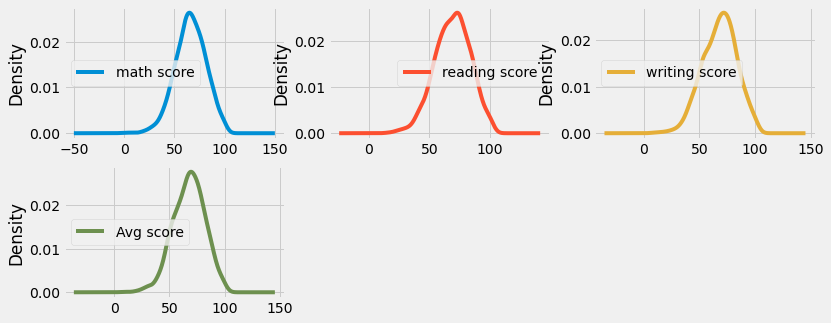

In [201]:
df_num.plot(kind='density',subplots=True,sharex=False,layout=(2,3),figsize=(12,5))
plt.show()

### Skewness and Kurtosis

In [18]:
df_num.skew()

math score      -0.278935
reading score   -0.259105
writing score   -0.289444
dtype: float64

In [19]:
df_num.kurt()

math score       0.274964
reading score   -0.068265
writing score   -0.033365
dtype: float64

### Correlation

In [20]:
df_num.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


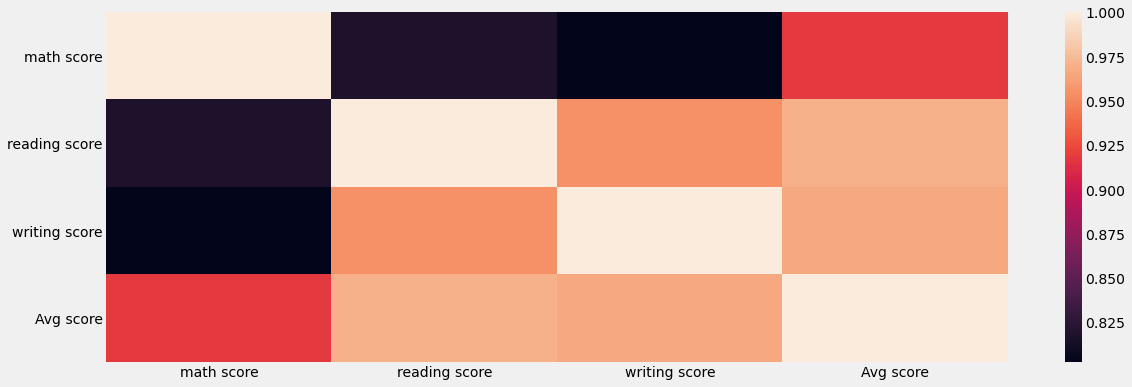

In [200]:
sns.heatmap(df_num.corr())
plt.show()

## Skewness of Marks

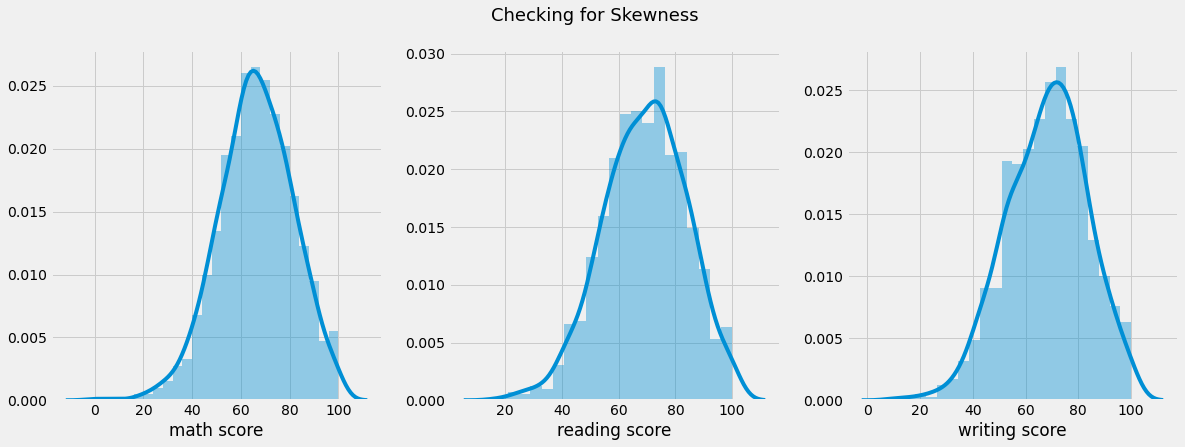

In [175]:
plt.subplot(1, 3, 1)
sns.distplot(df['math score'])

plt.subplot(1, 3, 2)
sns.distplot(df['reading score'])

plt.subplot(1, 3, 3)
sns.distplot(df['writing score'])

plt.suptitle('Checking for Skewness', fontsize = 18)
plt.show()

# PROBABILITY

### 1) Lets check the Probability of Students Passing in all the three Subjects

In [176]:
total_students = df.shape[0]
number_of_students_passing_in_all_subjects = df[(df['math score'] > 40) &
                                                  (df['writing score'] > 40) & 
                                                  (df['reading score'] > 40)].shape[0]
probability_of_students_passing_in_all_the_subjects = (number_of_students_passing_in_all_subjects/total_students)*100
print("The Probability of Students Passing in all the Subjects is {0:.2f} %".format(probability_of_students_passing_in_all_the_subjects))

The Probability of Students Passing in all the Subjects is 93.90 %


### 2)Lets check the Probability of Students Scoring more than 90 in all the three Subjects

In [226]:
total_students = df.shape[0]
number_of_students_scoring_more_than_90 = df[(df['math score'] > 90) &
                                                  (df['writing score'] > 90) & 
                                                  (df['reading score'] > 90)].shape[0]

probability_of_students_scoring_more_than_90_in_all_subjects = (number_of_students_scoring_more_than_90/total_students)*100
print("The Probability of Students Scoring more than 90 in all the three Subjects {0:.2f} %".
      format(probability_of_students_scoring_more_than_90_in_all_subjects))

The Probability of Students Scoring more than 90 in all the three Subjects 2.30 %


# SAMPLING

In [179]:
# lets take seed so that everytime the random values come out to be constant
np.random.seed(6)

# lets take 100 sample values from the dataset of 1000 values
sample_math_marks = np.random.choice(a= df['math score'], size=100)

# getting the sample mean
print ("Sample mean for Math Scores:", sample_math_marks.mean() )          

# getting the population mean
print("Population mean for Math Scores:", df['math score'].mean())

# lets take 100 sample values from the dataset of 1000 values
sample_reading_marks = np.random.choice(a= df['reading score'], size=100)

# getting the sample mean
print ("\nSample mean for Reading Scores:", sample_reading_marks.mean() )          

# getting the population mean
print("Population mean for Reading Scores:", df['reading score'].mean())

# lets take 100 sample values from the dataset of 1000 values
sample_writing_marks = np.random.choice(a= df['writing score'], size=100)

# getting the sample mean
print ("\nSample mean for Writing Scores:", sample_math_marks.mean() )          

# getting the population mean
print("Population mean for Writing Scores:", df['writing score'].mean())

Sample mean for Math Scores: 63.12
Population mean for Math Scores: 66.089

Sample mean for Reading Scores: 68.5
Population mean for Reading Scores: 69.169

Sample mean for Writing Scores: 63.12
Population mean for Writing Scores: 68.054


# HYPOTHESIS TESTING

# TWO SIDED T-TEST

## Problem Statement:
## *1. Does one particular gender excel over the other?*

### H<sub>1</sub>: There is a difference between the mean female score percent and mean male score percent.

### H<sub>0</sub>: There is no difference in mean score of female and male.

In [27]:
df_fem=df[df['gender']=='female'].iloc[:,[5,6,7]]

In [28]:
df_mal=df[df['gender']=='male'].iloc[:,[5,6,7]]

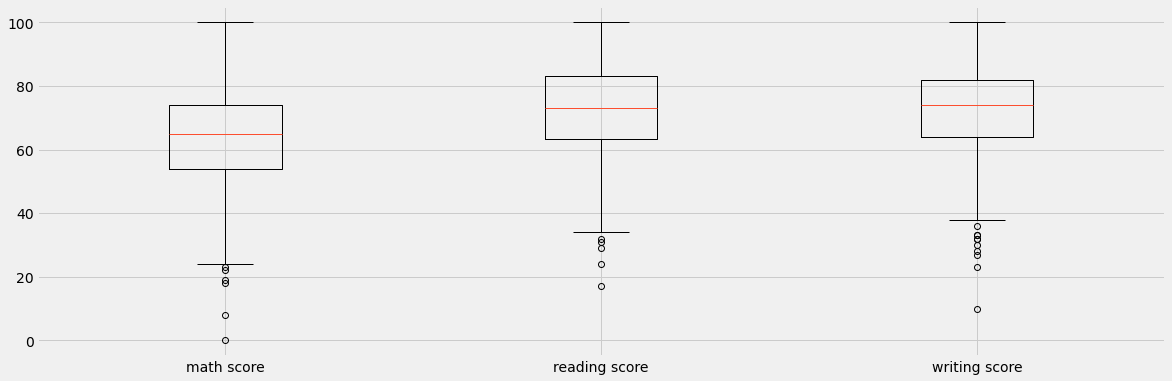

In [198]:
#Boxplot of marks scored by females

plt.boxplot([df_fem["math score"],df_fem["reading score"],df_fem["writing score"]])
plt.xticks([1,2,3],["math score","reading score","writing score"])
plt.show()

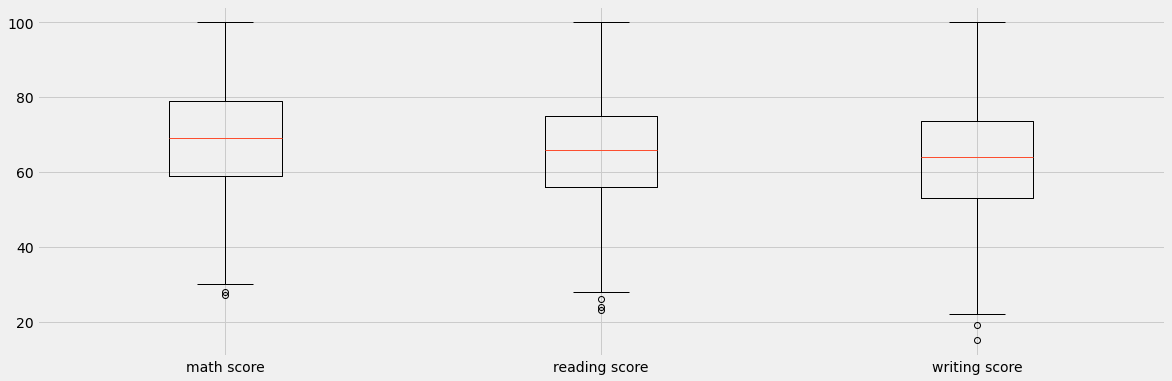

In [197]:
#Boxplot of marks scored by males

plt.boxplot([df_mal["math score"],df_mal["reading score"],df_mal["writing score"]])
plt.xticks([1,2,3],["math score","reading score","writing score"])
plt.show()

In [29]:
df_fem['Avg score'] = (df_fem['math score'] + df_fem['reading score'] + df_fem['writing score'])/3

In [30]:
df_mal['Avg score'] = (df_mal['math score'] + df_mal['reading score'] + df_mal['writing score'])/3

In [31]:
df_fem['Avg score'].mean()

69.56949806949811

In [32]:
df_mal['Avg score'].mean()

65.83748271092671

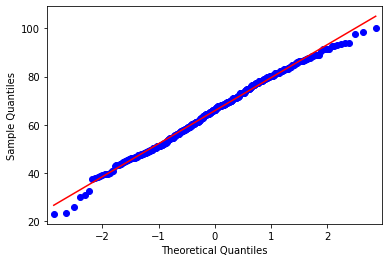

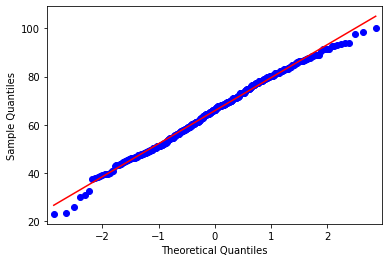

In [27]:
import statsmodels.api as sm
sm.qqplot(df_mal["Avg score"],line='s')

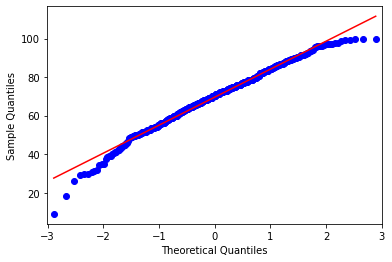

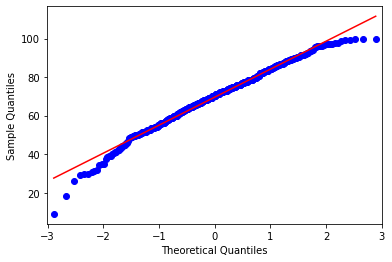

In [31]:
sm.qqplot(df_fem["Avg score"],line='s')

From the Visual Interpretation we can conclude that both df_mal and df_fem are normally distributed.

So, we move on to Levene test for checking population variance.

In [15]:
#Levene test for check of population variance

stats.levene(df_mal['Avg score'],df_fem['Avg score'])

LeveneResult(statistic=0.13445392794140468, pvalue=0.7139357521839773)

Since the pvalue>0.05 from the levene test, we can conclude that the population variance are equal.

Thus, we can do Two Sided t-test on the sample data.

In [16]:
t_stat,pval=stats.ttest_ind(df_mal['Avg score'],df_fem['Avg score'])

print('P-Value: ',pval)

P-Value:  3.311973638243664e-05


#### Interpretation:

A 2 sided t-test was used to test for a significant difference between the mean percent score between male and female. From the t-test that’s been carried out, the p-value is (3.312e-05) found to be p-value<0.001. We already know that the significance level is 0.05. Clearly, the p-value is lesser than the significance level and the 95% CI of the mean difference does not capture Ho:mu= 0. This indicates that there is a difference i.e. mean female score percent is higher mean male score percent and we reject the null hypothesis (Ho) and test is statistically significant.

Thus we have statistical evidence that mean female score percent is higher than the mean male score percent.

In [33]:
df_fem['Avg score'].mean()

69.56949806949811

In [34]:
df_mal['Avg score'].mean()

65.83748271092671

# WILCOXON RANK SUM TEST

## *2. Is there an effect of Parental Level of Education on Scores of Students?*

### H<sub>1</sub>: Higher the Parental Level of Education, Higher are the Student Scores

### H<sub>0</sub>: Parental Level of Education has no effect on Student Scores

In [17]:
df1=df[['parental level of education','Avg score']]
df1

,parental level of education,Avg score
0,bachelor's degree,72.666667
1,some college,82.333333
2,master's degree,92.666667
3,associate's degree,49.333333
4,some college,76.333333
...,...,...
995,master's degree,94.000000
996,high school,57.333333
997,high school,65.000000
998,some college,74.333333


In [159]:
df1['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

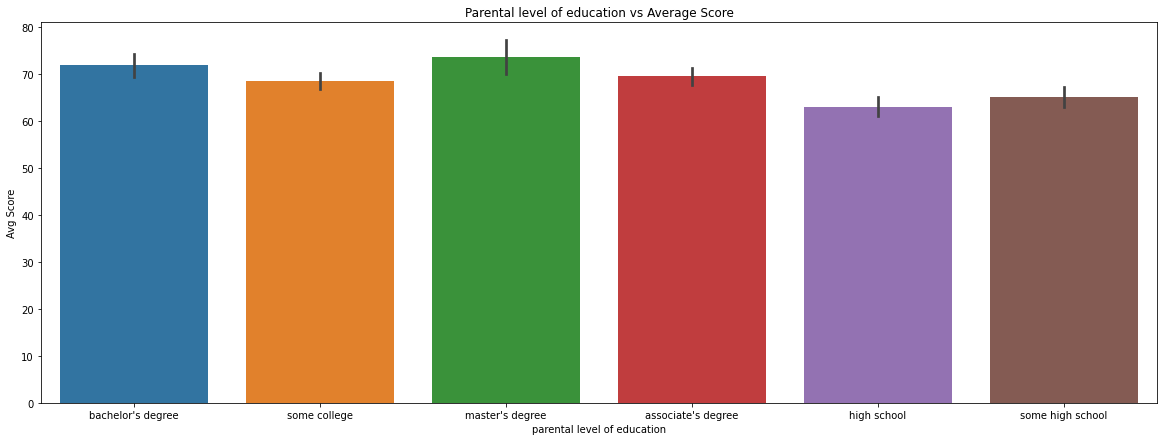

In [25]:
plt.figure(figsize=(20,7))
sns.barplot(x=df1['parental level of education'],y=df1['Avg score'])
plt.xlabel('parental level of education')
plt.ylabel('Avg Score')
plt.title('Parental level of education vs Average Score')
plt.show()

In [168]:
# Checking for normality of data at 95% confidence level

d1=df1[df1["parental level of education"]=='some college'].sample(50,random_state=1)
d2=df1[df1["parental level of education"]=='''associate's degree'''].sample(50,random_state=1)
d3=df1[df1["parental level of education"]=='high school'].sample(50,random_state=1)
d4=df1[df1["parental level of education"]=='some high school'].sample(50,random_state=1)
d5=df1[df1["parental level of education"]=='''bachelor's degree'''].sample(50,random_state=1)
d6=df1[df1["parental level of education"]=='''master's degree'''].sample(50,random_state=1)
print(stats.shapiro(d1["Avg score"]))
print(stats.shapiro(d2["Avg score"]))
print(stats.shapiro(d3["Avg score"]))
print(stats.shapiro(d4["Avg score"]))
print(stats.shapiro(d5["Avg score"]))
print(stats.shapiro(d6["Avg score"]))


ShapiroResult(statistic=0.9858857989311218, pvalue=0.8089287281036377)
ShapiroResult(statistic=0.9733220934867859, pvalue=0.31426510214805603)
ShapiroResult(statistic=0.9908530116081238, pvalue=0.9639900922775269)
ShapiroResult(statistic=0.9426544308662415, pvalue=0.01718040741980076)
ShapiroResult(statistic=0.9823721051216125, pvalue=0.6553736329078674)
ShapiroResult(statistic=0.9721046090126038, pvalue=0.2813069522380829)


Since all data is not greater than 5% level of significance, so we conclude that the data is not normal.

So we opt for Non-Parametric Test

In [169]:
z_val = round(stats.norm.isf(q = 0.05), 2)
print('Critical value for one-tailed Z-test:', z_val)
test_stat, p_value = stats.ranksums(d3["Avg score"],d6["Avg score"])
print("Test stat:",test_stat)    


Critical value for one-tailed Z-test: 1.64
Test stat: -3.529635776234042


#### Interpretation:

Since test statistic is less than critical value with 95% confidence it falls in the acceptance region and so we fail to reject the null hypothesis and conclude that Parental Level of Education has no effect on Student Scores.


# KRUSKAL WALLIS H TEST

## *3.Is there any difference in Average Score from one group of race/ethnicity to another.*

### H<sub>0</sub>: Average score is same for each group of race/ethnicity.

### H<sub>1</sub>: Average score is different for at least for one group of race/ethnicity

In [180]:
g1 = df[df['race/ethnicity']=='group A']['Avg score']
g2 = df[df['race/ethnicity']=='group B']['Avg score']
g3 = df[df['race/ethnicity']=='group C']['Avg score']
g4 = df[df['race/ethnicity']=='group D']['Avg score']
g5 = df[df['race/ethnicity']=='group E']['Avg score']

In [181]:
test, p_val = stats.shapiro(g1)
print('P value for g1: ', p_val)

test, p_val = stats.shapiro(g2)
print('P value for g2: ', p_val)

test, p_val = stats.shapiro(g3)
print('P value for g3: ', p_val)

test, p_val = stats.shapiro(g4)
print('P value for g4: ', p_val)

test, p_val = stats.shapiro(g5)
print('P value for g5: ', p_val)

test, p_val = stats.levene(g1,g2,g3,g4,g5)
print('P value for levene: ', p_val)

P value for g1:  0.5322851538658142
P value for g2:  0.01986812800168991
P value for g3:  0.018707381561398506
P value for g4:  0.19886213541030884
P value for g5:  0.08037383109331131
P value for levene:  0.6984436461475684


Based on Shapiro and Levene test we can easily conclude that this data is not normally distributed, hence we perform the non-parametric test. Levene test pases but shapiro fails, if shapiro fails then we should go for non-parametric test.

In [182]:
alpha=0.05
test_stat, p_value = stats.kruskal(df[df['race/ethnicity']=='group A']['Avg score'],
                                   df[df['race/ethnicity']=='group B']['Avg score'],
                                   df[df['race/ethnicity']=='group C']['Avg score'],
                                   df[df['race/ethnicity']=='group D']['Avg score'],
                                   df[df['race/ethnicity']=='group E']['Avg score'])

print('P_value for Kruskal : ', p_value)
print('Significance level: ',alpha)

P_value for Kruskal :  2.6616632578889596e-07
Significance level:  0.05


#### Interpretation:

Here P_value( 2.61e-07) is less than the level of significance (0.05) thus we reject the null hypothesis. So we accept the alternate hypothesis and hence prove that Average score is different for at least for one group of race/ethnicity.

### Post Hoc Analysis using Conover Test

#### *Checking the Possibility of Identifying the Race/Ethnicity group with different Average Score or not at a 5% Level of Significance.*

In [185]:
scikit_posthocs.posthoc_conover(a = df, val_col = 'Avg score', group_col = 'race/ethnicity')

,group A,group B,group C,group D,group E
group A,1.000000e+00,0.089403,0.007338,0.000160,1.062213e-07
group B,8.940287e-02,1.000000,0.258170,0.009788,5.828420e-06
group C,7.337576e-03,0.258170,1.000000,0.086744,7.265940e-05
group D,1.595612e-04,0.009788,0.086744,1.000000,1.283869e-02
group E,1.062213e-07,0.000006,0.000073,0.012839,1.000000e+00


#### The P value for pairs: 

Group A and B: H0 is accepted, Group A and C: H0 is rejected, Group A and D: H0 is rejected, Group A and E: H0 is rejected.

Group B and A: H0 is accepted, Group B and C: H0 is accepted, Group B and D: H0 is rejected, Group B and E: H0 is rejected.

Group C and A: H0 is rejected, Group C and B: H0 is accepted, Group C and D: H0 is accepted, Group C and E: H0 is rejected.

Group D and A: H0 is rejected, Group D and B: H0 is rejected, Group D and C: H0 is accepted, Group D and E: H0 is rejected.

Group E and A: H0 is rejected, Group E and B: H0 is rejected, Group E and C: H0 is rejected, Group E and D: H0 is rejected.


Thus, we can conclude that the Average Score of Students differ with most of the groups of race/ethnicity except for a few exceptions.



# CHI-SQUARE TWO FACTOR

## *4. Does the Test Preparation Course depends upon the Parental Level of Education?*

### H<sub>0</sub>:  Parental level of education does not depend upon the test preparation course.

### H<sub>1</sub>: Parental level of education depends upon the test preparation course.

In [186]:
pd.crosstab(index= df['parental level of education'],columns=df['test preparation course'])

test preparation course,completed,none
parental level of education,,
associate's degree,82,140
bachelor's degree,46,72
high school,56,140
master's degree,20,39
some college,77,149
some high school,77,102


In [187]:
cc = pd.crosstab(index= df['parental level of education'],columns=df['test preparation course'])
chi_sq_Stat, p_value, deg_freedom, exp_freq = stats.chi2_contingency(cc)
stats.chi2_contingency(cc)

print('Chi-statistic: {} \nP-value: {} \nDegrees of freedom: {}' .format(chi_sq_Stat, p_value,deg_freedom))

Chi-statistic: 9.54407054307069 
P-value: 0.08923388625809343 
Degrees of freedom: 5


#### Interpretation:

Since the p-value(0.089) is greater than level of significance (0.05), we accept the null hypothesis. Therefore we can say with 95% confidence that Parental level of education does not depend upon the test preparation course.

# CHI-SQUARE ONE FACTOR TEST

## *5. Survey Claims that 60% of Students opted for standard lunch while the rest opted for free/reduced lunch. Check for Goodness of Fit Test.*

### H<sub>0</sub>: 60% of students have opted for standard lunch and  40% have opted for free/reduced lunch.

### H<sub>1</sub>: It is different from the claimed value.

In [188]:
df['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

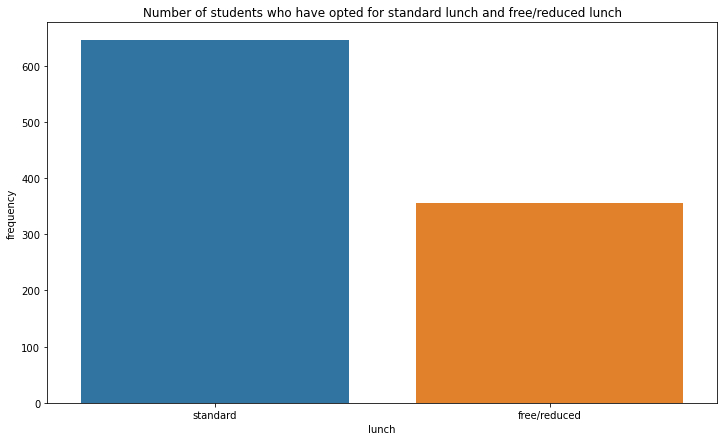

In [26]:
plt.figure(figsize=(12,7))
sns.barplot(df['lunch'].value_counts().index, df['lunch'].value_counts().values)
plt.xlabel('lunch')
plt.ylabel('frequency')
plt.title('Number of students who have opted for standard lunch and free/reduced lunch')
plt.show()

In [191]:
obs = df['lunch'].value_counts().values
n = sum(obs)
exp = np.array([n*.60,n*.40])

In [193]:
stats.chisquare(obs,exp)

Power_divergenceResult(statistic=8.4375, pvalue=0.003675612117741226)

#### Interpretation:

Since the Pvalue from the Chi-Square test is less than the level of significance (0.05), thus we reject the null hypothesis.
Hence, the claimed value in the survey is False.

# MANN-WHITNEY U TEST

## *6. Does Practice helps in Excel Scores?*

### H<sub>0</sub>: There are no differences in Average Scores of students who have taken vs who have not taken the pre-test courses.

### H<sub>1</sub>: The Average Scores of students who have taken pre-test courses is higher than the Average Scores of students who have not taken pre-test course.

In [9]:
df_com=df[df['test preparation course']=='completed'].iloc[:,[5,6,7,8]]
df_incom=df[df['test preparation course']=='none'].iloc[:,[5,6,7,8]]

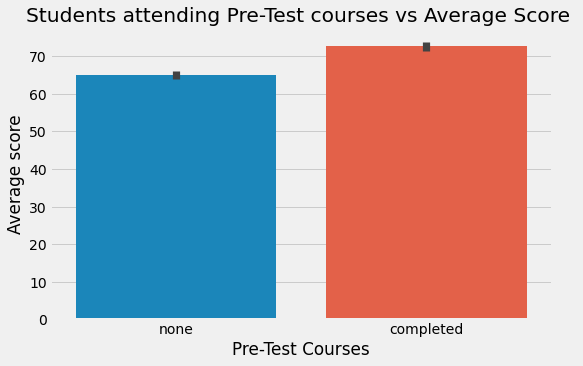

In [211]:
sage1 = df.groupby("test preparation course", as_index = False)["Avg score"].mean().sort_values(by="Avg score",ascending = False)
plt.figure(figsize=(8,5))
sns.barplot(x = "test preparation course",
            y = "Avg score",
            data = df)
plt.xlabel("Pre-Test Courses")
plt.ylabel('Average score')
plt.title('Students attending Pre-Test courses vs Average Score ')
plt.show()

In [10]:
stats.shapiro(df_com['Avg score'])

ShapiroResult(statistic=0.9907779097557068, pvalue=0.02437392808496952)

In [11]:
stats.shapiro(df_incom['Avg score'])

ShapiroResult(statistic=0.993720293045044, pvalue=0.00897547323256731)

Since both the Pvalues return values lesser than the level of significance, so it does not follow normal distribution.

In [12]:
test_stat, p_value = stats.mannwhitneyu(df_com['Avg score'],df_incom['Avg score'],alternative = 'greater')

# print the test statistic and corresponding p-value
print('Test statistic:', test_stat)
print('p-value:', p_value)

Test statistic: 150319.5
p-value: 3.1014975196138443e-16


#### Interpretation: 

Since here we can see that the p-value(6.20e-16) is less than level of significance (0.05), thus we reject the null hypothesis and accept alternate hypothesis, and hence prove that students opting for pre-test courses do have higher average scores when compared to students not opting for pre-test courses.

# SIMULATION

In [43]:
def central_limit_theorem(df,column_names,n_samples = 1000, sample_size = 500):
    min_value = 0 
    max_value = df.count()  
    b = {}
    for i in range(n_samples):
        x = np.unique(np.random.randint(min_value, max_value, size = sample_size)) 
        b[i] = df[x].mean()   
    c = pd.DataFrame()
    c['sample'] = b.keys()   
    c['Mean'] = b.values()  
    plt.figure(figsize= (15,5))

    plt.subplot(1,2,2)
    sns.distplot(c.Mean,color='blue')
    plt.title(f"Sampling Distribution. \n \u03bc = {round(c.Mean.mean(), 3)} & SE = {round(c.Mean.std(),3)}")
    plt.xlabel(column_names)
    plt.ylabel('freq')

    plt.subplot(1,2,1)
    sns.distplot(df,color='red')
    plt.title(f"Population Distribution. \n \u03bc = {round(df.mean(), 3)} & \u03C3 = {round(df.std(),3)}")
    plt.xlabel(column_names)
    plt.ylabel('freq')

    plt.show()

series1 = df["math score"]
series2 = df["reading score"]
series3 = df["writing score"]
series4 = df["Avg score"]

## Simulations with Sample Size=20 and No. of Samples=20

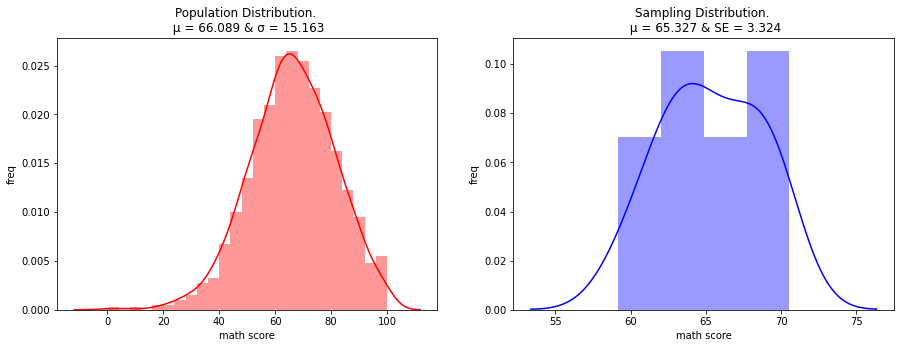

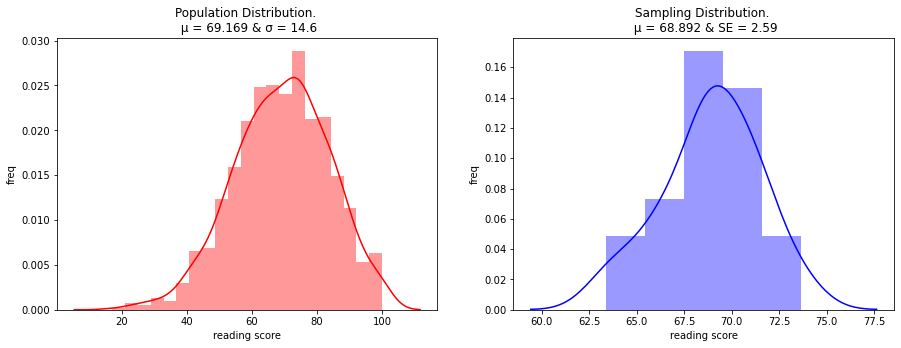

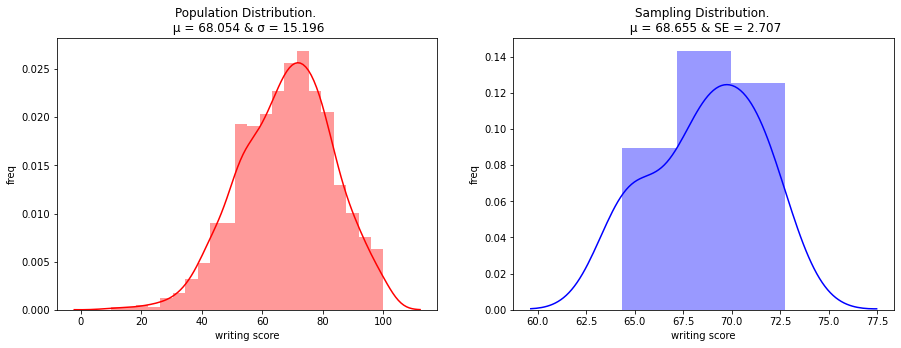

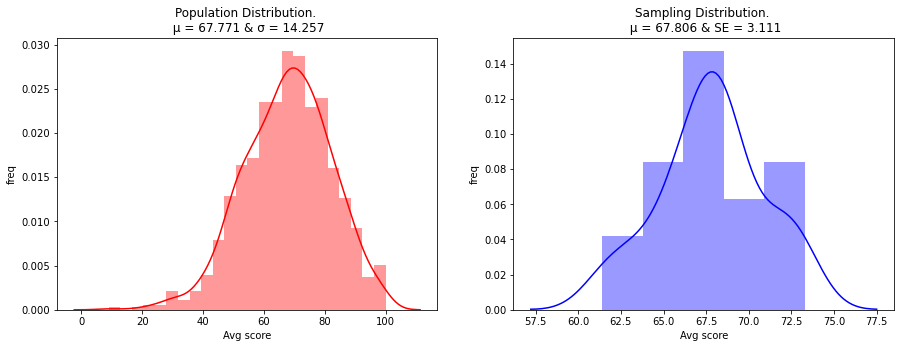

In [44]:
central_limit_theorem(series1,'math score',n_samples = 20, sample_size = 20)
central_limit_theorem(series2,"reading score",n_samples =20, sample_size = 20)
central_limit_theorem(series3,"writing score",n_samples =20, sample_size = 20)
central_limit_theorem(series4,"Avg score",n_samples =20, sample_size = 20)

## Simulations with Sample Size=500 and No. of Samples=700

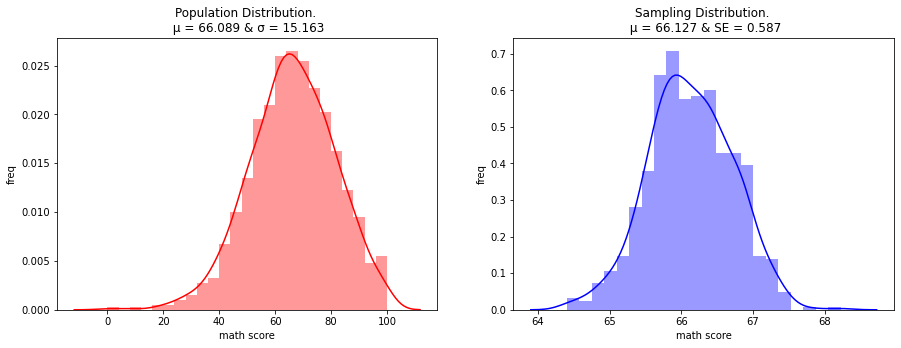

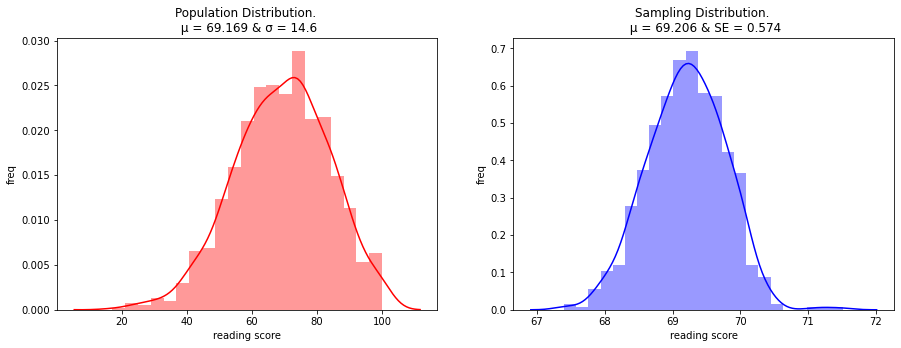

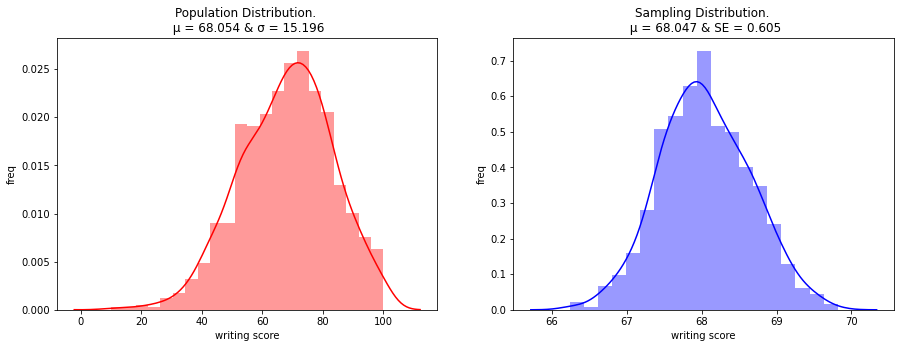

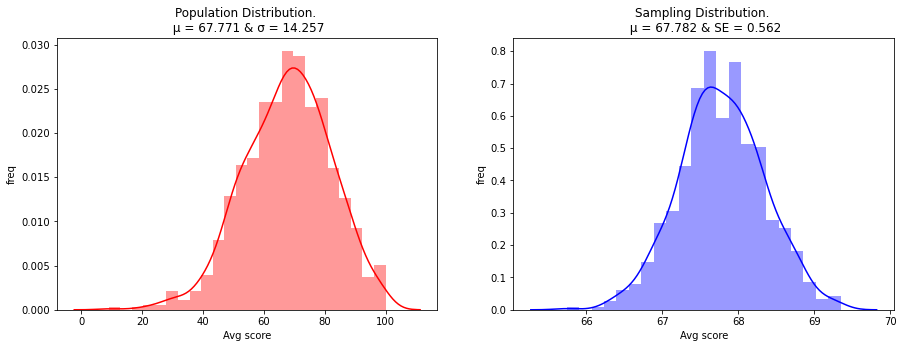

In [41]:
central_limit_theorem(series1,'math score',n_samples = 700, sample_size = 500)
central_limit_theorem(series2,"reading score",n_samples =700, sample_size = 500)
central_limit_theorem(series3,"writing score",n_samples =700, sample_size = 500)
central_limit_theorem(series4,"Avg score",n_samples =700, sample_size = 500)

######################################################## END ##########################################################